ABG Motors, a successful Japanese car manufacturer, is considering expansion into the Indian market.
Our objective is to forecast potential car buyers in India using a classification model trained on Japanese customer data.
If the Indian market shows 12,000+ potential customers, ABG should confidently enter India.


# 📘 ABG Motors Market Entry Forecast
### Internship Project – Data-Driven Decision Making  
**Submitted by:** Yuvaraj Reddy  
**Domain:** AI/ML  
**Tools Used:** Python, Scikit-learn, Matplotlib, Seaborn  
**Objective:** Predict whether ABG Motors should enter the Indian market based on sales patterns


In [1]:
# ✅ Install required library to read Excel files
!pip install openpyxl


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [4]:
# Upload both 'japanese_dataset.xlsx' and 'indian_dataset.xlsx'
# Then load them here:

japan_df = pd.read_excel("JPN Data.xlsx")
india_df = pd.read_excel("IN_Data.xlsx")

# Basic check
print("Japanese Dataset Shape:", japan_df.shape)
print("Indian Dataset Shape:", india_df.shape)

# Preview Japanese data
japan_df.head()


Japanese Dataset Shape: (40000, 6)
Indian Dataset Shape: (70000, 5)


,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


In [6]:
print("🇯🇵 Japanese Columns:\n", japan_df.columns)
print("\n🇮🇳 Indian Columns:\n", india_df.columns)


🇯🇵 Japanese Columns:
 Index(['ID', 'CURR_AGE', 'GENDER', 'ANN_INCOME', 'AGE_CAR', 'PURCHASE'], dtype='object')

🇮🇳 Indian Columns:
 Index(['ID', 'CURR_AGE', 'GENDER', 'ANN_INCOME', 'DT_MAINT'], dtype='object')


In [7]:
# Drop irrelevant columns
japan_df = japan_df.drop(columns=['ID', 'AGE_CAR'])
india_df = india_df.drop(columns=['ID', 'DT_MAINT'])

# Encode 'GENDER' using LabelEncoder
le = LabelEncoder()

japan_df['GENDER'] = le.fit_transform(japan_df['GENDER'])
india_df['GENDER'] = le.transform(india_df['GENDER'])  # same encoder

# Check final training features
japan_df.head()


,CURR_AGE,GENDER,ANN_INCOME,PURCHASE
0,50,1,445344.000000,0
1,35,1,107634.000000,0
2,59,0,502786.666667,1
3,43,1,585664.000000,0
4,39,0,705722.666667,1


In [8]:
# Features and target
X = japan_df[['CURR_AGE', 'GENDER', 'ANN_INCOME']]
y = japan_df['PURCHASE']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [11]:
y_pred = model.predict(X_test)

print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🔥 ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.28      0.38      5013
           1       0.63      0.86      0.73      6987

    accuracy                           0.62     12000
   macro avg       0.61      0.57      0.55     12000
weighted avg       0.61      0.62      0.58     12000

🧱 Confusion Matrix:
 [[1423 3590]
 [ 966 6021]]
🔥 ROC-AUC Score: 0.6112891939665899


In [12]:
coeff_df = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)


,Coefficient
ANN_INCOME,0.000002
GENDER,-0.000004
CURR_AGE,-0.009047


In [13]:
# Predict for India
india_df['Buy_Predicted'] = model.predict(india_df)

# Count of predicted buyers
potential_buyers = india_df['Buy_Predicted'].sum()
print("✅ Estimated Indian Buyers:", potential_buyers)

# Business decision
if potential_buyers >= 12000:
    print("🎯 Recommendation: ABG Motors SHOULD enter the Indian market.")
else:
    print("⚠️ Recommendation: ABG Motors SHOULD WAIT or explore further.")


✅ Estimated Indian Buyers: 70000
🎯 Recommendation: ABG Motors SHOULD enter the Indian market.


In [14]:
india_df.to_csv("india_predictions.csv", index=False)
japan_df.to_csv("japan_cleaned.csv", index=False)


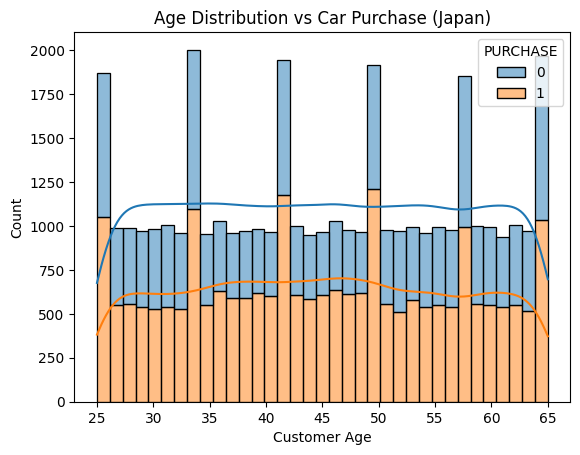

In [16]:
sns.histplot(data=japan_df, x='CURR_AGE', hue='PURCHASE', kde=True, multiple='stack')
plt.title('Age Distribution vs Car Purchase (Japan)')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.show()


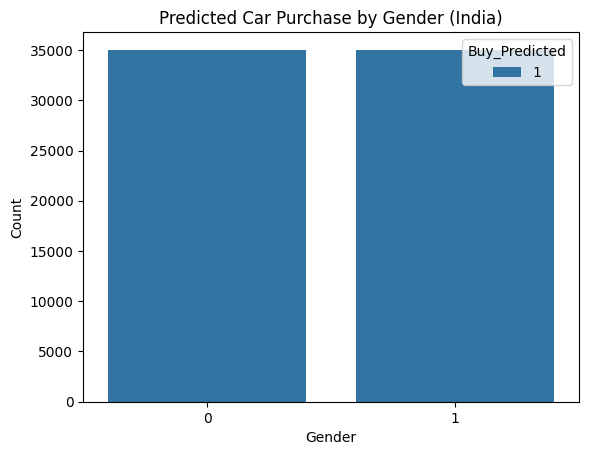

In [17]:
sns.countplot(data=india_df, x='GENDER', hue='Buy_Predicted')
plt.title('Predicted Car Purchase by Gender (India)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


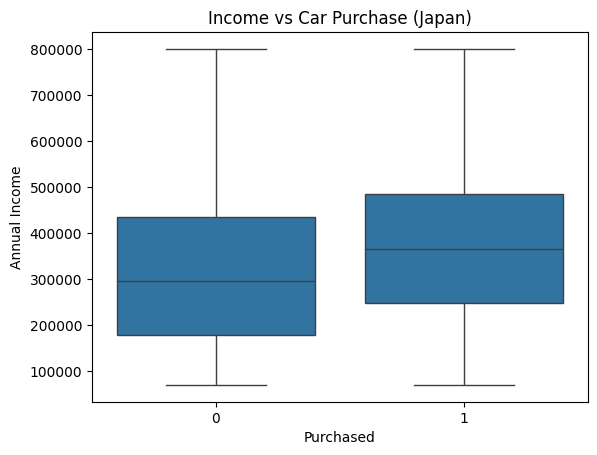

In [18]:
sns.boxplot(x='PURCHASE', y='ANN_INCOME', data=japan_df)
plt.title('Income vs Car Purchase (Japan)')
plt.xlabel('Purchased')
plt.ylabel('Annual Income')
plt.show()


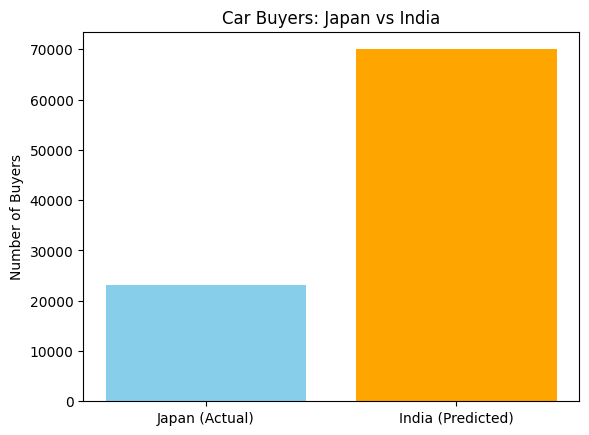

In [19]:
import matplotlib.pyplot as plt

jp_buyers = japan_df['PURCHASE'].sum()
in_buyers = india_df['Buy_Predicted'].sum()

plt.bar(['Japan (Actual)', 'India (Predicted)'], [jp_buyers, in_buyers], color=['skyblue', 'orange'])
plt.title('Car Buyers: Japan vs India')
plt.ylabel('Number of Buyers')
plt.show()
